<a href="https://colab.research.google.com/github/rebeccahe1998/MachineLearning_CTR_project/blob/main/Hyper_tune_XGBOOST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/MLproject/train_processed.csv",index_col=0)

train

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,hour_01-03,hour_03-05,hour_05-07,hour_07-09,hour_09-11,hour_11-13,hour_13-15,hour_15-17,hour_17-19,hour_19-21,hour_21-23,hour_23-01,C1_1,C1_10,C1_12,C1_2,C1_5,banner_pos_0,banner_pos_1,banner_pos_2,banner_pos_3,banner_pos_4,site_id_higher,site_id_lower,site_id_mid,site_id_very_high,site_id_very_low,site_domain_higher,site_domain_lower,site_domain_mid,site_domain_very_high,site_domain_very_low,site_category_higher,site_category_lower,site_category_mid,site_category_very_high,site_category_very_low,device_ip_higher,device_ip_lower,device_ip_mid,device_ip_very_high,device_ip_very_low,device_model_higher,device_model_lower,device_model_mid,device_model_very_high,device_model_very_low,device_type_0,device_type_1,device_type_4,device_type_5,device_conn_type_0,device_conn_type_2,C14_higher,C14_lower,C14_mid,C14_very_high,C14_very_low,C15_1,C15_181,C15_201,C15_609,C15_97,C16_1,C16_17,C16_231,C16_31,C16_461,C16_71,C18_0,C18_1,C18_2,C18_3,click
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2683782,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0.0
2683783,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0.0
2683784,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1.0
2683785,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0.0


In [ ]:
y_train = train['click']

In [ ]:
pre_X = train[train['click'] == 0].sample(n=len(train[train['click'] == 1]), random_state=111)
pre_X = pd.concat([pre_X, train[train['click'] == 1]]).sample(frac=1)
pre_y = pre_X[['click']]
pre_X.drop(['click'], axis=1, inplace=True)



In [ ]:
pre_y.click.value_counts()

1.0    542329
0.0    542329
Name: click, dtype: int64

In [ ]:
pre_X

,hour_01-03,hour_03-05,hour_05-07,hour_07-09,hour_09-11,hour_11-13,hour_13-15,hour_15-17,hour_17-19,hour_19-21,hour_21-23,hour_23-01,C1_1,C1_10,C1_12,C1_2,C1_5,banner_pos_0,banner_pos_1,banner_pos_2,banner_pos_3,banner_pos_4,site_id_higher,site_id_lower,site_id_mid,site_id_very_high,site_id_very_low,site_domain_higher,site_domain_lower,site_domain_mid,site_domain_very_high,site_domain_very_low,site_category_higher,site_category_lower,site_category_mid,site_category_very_high,site_category_very_low,device_ip_higher,device_ip_lower,device_ip_mid,device_ip_very_high,device_ip_very_low,device_model_higher,device_model_lower,device_model_mid,device_model_very_high,device_model_very_low,device_type_0,device_type_1,device_type_4,device_type_5,device_conn_type_0,device_conn_type_2,C14_higher,C14_lower,C14_mid,C14_very_high,C14_very_low,C15_1,C15_181,C15_201,C15_609,C15_97,C16_1,C16_17,C16_231,C16_31,C16_461,C16_71,C18_0,C18_1,C18_2,C18_3
576515,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
265402,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1266829,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1504441,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
1023739,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864147,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
231551,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
43260,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1993632,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# 將新的資料集分割為訓練集與驗證集
pre_X_train, pre_X_test, pre_y_train, pre_y_test = train_test_split(pre_X, pre_y, test_size=0.20, stratify=pre_y, random_state=1)

In [ ]:
params = {"criterion":["gini", "entropy"], "max_depth":range(5,20)}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid=params, scoring='roc_auc', cv=100, verbose=1, n_jobs=-1)
grid_search.fit(pre_X_train, pre_y_train)
grid_search.best_score_, grid_search.best_estimator_, grid_search.best_params_

Fitting 100 folds for each of 30 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 32.8min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 59.0min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 84.8min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 116.7min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed: 151.2min finished


(0.7237444212508735,
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                        max_depth=14, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 {'criterion': 'entropy', 'max_depth': 14})

In [ ]:
tree = grid_search.best_estimator_
tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=14, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
tree.fit(pre_X,pre_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=14, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
feature_importances = pd.DataFrame(tree.feature_importances_)
feature_importances.index = pre_X_train.columns
feature_importances = feature_importances.sort_values(0,ascending=False)
feature_importances

,0
site_id_very_low,0.547359
site_id_very_high,0.152951
device_model_very_low,0.028333
C18_2,0.026926
banner_pos_0,0.019051
...,...
banner_pos_3,0.000000
device_type_5,0.000000
C1_1,0.000000
device_type_4,0.000000


In [ ]:
pre_X_train = pre_X_train[feature_importances.index[:int(len(feature_importances)/2)]]
pre_X_test = pre_X_test[feature_importances.index[:int(len(feature_importances)/2)]]

In [ ]:
pre_X_train

,site_id_very_low,site_id_very_high,device_model_very_low,C18_2,banner_pos_0,C14_very_low,C18_3,C14_very_high,device_ip_very_low,C16_231,device_model_very_high,device_model_higher,site_category_very_low,site_category_very_high,hour_03-05,hour_19-21,C18_0,hour_17-19,site_domain_higher,site_id_higher,hour_05-07,C14_higher,hour_21-23,device_model_mid,device_ip_mid,site_category_mid,device_conn_type_0,C1_2,banner_pos_1,C14_lower,C18_1,device_model_lower,hour_01-03,device_conn_type_2,hour_23-01,site_domain_very_low
2368386,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0
932793,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,0,0,1
1611855,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0
2595380,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0
2107577,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890734,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
2415265,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0
1215694,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0
2625099,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0


In [ ]:
params = {"criterion":["gini", "entropy"], "max_depth":range(1,14)}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid=params, scoring='roc_auc', cv=100, verbose=1, n_jobs=-1)
grid_search.fit(pre_X_train, pre_y_train)
grid_search.best_score_, grid_search.best_estimator_, grid_search.best_params_

Fitting 100 folds for each of 26 candidates, totalling 2600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 23.6min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 30.7min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 46.8min
[Parallel(n_jobs=-1)]: Done 2600 out of 2600 | elapsed: 51.6min finished


(0.7233954488690111,
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                        max_depth=13, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 {'criterion': 'entropy', 'max_depth': 13})

In [ ]:
pre_X = pre_X[feature_importances.index[:int(len(feature_importances)/2)]]
pre_X

,site_id_very_low,site_id_very_high,device_model_very_low,C18_2,banner_pos_0,C14_very_low,C18_3,C14_very_high,device_ip_very_low,C16_231,device_model_very_high,device_model_higher,site_category_very_low,site_category_very_high,hour_03-05,hour_19-21,C18_0,hour_17-19,site_domain_higher,site_id_higher,hour_05-07,C14_higher,hour_21-23,device_model_mid,device_ip_mid,site_category_mid,device_conn_type_0,C1_2,banner_pos_1,C14_lower,C18_1,device_model_lower,hour_01-03,device_conn_type_2,hour_23-01,site_domain_very_low
576515,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1
265402,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,1,0,0,0
1266829,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1
1504441,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,1
1023739,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864147,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1
231551,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,1
43260,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,1
1993632,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0


In [ ]:

tree = grid_search.best_estimator_
tree.fit(pre_X,pre_y)

# 輸出重要特徵，並依特徵之重要性排序
feature_importances = pd.DataFrame(tree.feature_importances_)
feature_importances.index = pre_X_train.columns
feature_importances = feature_importances.sort_values(0,ascending=False)
feature_importances

In [ ]:
feature_len = len(feature_importances[feature_importances[feature_importances.columns[0]] > 0.005])
feature_len

26

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/MLproject/test_processed.csv",index_col=0)
test

In [ ]:
test = test[feature_importances[:feature_len].index]
test

,site_id_very_low,site_id_very_high,device_model_very_low,C18_2,C14_very_low,banner_pos_1,C18_3,C16_231,C14_very_high,device_ip_very_low,banner_pos_0,device_model_higher,device_model_very_high,hour_03-05,hour_19-21,site_category_very_low,hour_17-19,C18_0,site_category_very_high,site_id_higher,site_domain_higher,hour_05-07,device_ip_mid,C14_higher,hour_21-23,C1_2
0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473605,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0
473606,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
473607,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0
473608,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0


In [ ]:
y = train[['click']]
X = train[feature_importances[:feature_len].index]


In [ ]:
y.click.value_counts()

0.0    2141458
1.0     542329
Name: click, dtype: int64

In [ ]:
#from xgboost import XGBClassifier


model = XGBClassifier(tree_method = 'gpu_hist', n_jobs=-1, n_estimators=1000, max_depth=13, learning_rate=0.05)
model.fit(X,y.values.ravel())
y_pred = model.predict(X)
#print("Roc_auc_score: ",roc_auc_score(y,y_pred)*100,"%")


In [ ]:
print("Roc_auc_score: ",roc_auc_score(y,y_pred)*100,"%")

Roc_auc_score:  52.31833151608524 %


In [ ]:
#from sklearn.metrics import log_loss
log_loss(y_pred,y)

6.875973168548958

In [ ]:
confmat = confusion_matrix(y_true=y, y_pred=y_pred, labels=[0, 1])




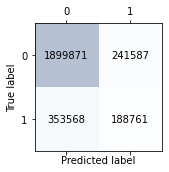

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [ ]:

y_test = model.predict_proba(test)[:,1]
y_test = pd.DataFrame(y_test)
y_test

,0
0,0.008222
1,0.090143
2,0.242460
3,0.061344
4,0.094584
...,...
473605,0.078895
473606,0.291264
473607,0.260941
473608,0.015938


In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/MLproject/test.gz", compression='gzip', header='infer')
df_test

,id,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,2683788,14102201,5,0,978ac369,7dec9eb9,9ccfa2ea,ecda2021,2021c8a9,07d7df22,a99f214a,04a7d14e,c1a17447,1,0,21694,201,31,2075,3,11,152,30
1,2683789,14102201,5,1,d410bf4e,dfe994f8,74073276,ecda2021,2021c8a9,07d7df22,a99f214a,87c2966e,24f6b932,1,0,16858,201,31,1465,3,7,201,11
2,2683790,14102201,5,0,078d3465,dd641cc7,8fd0aea4,ecda2021,2021c8a9,07d7df22,a99f214a,c45087c1,2203a096,1,0,21759,201,31,2080,0,3,84,209
3,2683791,14102201,5,1,e0db3d09,b30bad9c,74073276,ecda2021,2021c8a9,07d7df22,a99f214a,20d99e91,0eb711ec,1,0,19950,201,31,1378,3,135,76,11
4,2683792,14102201,5,1,9b971c93,983b49d4,f66779e6,ecda2021,2021c8a9,07d7df22,a99f214a,0672d4b1,6e1e2240,1,0,19950,201,31,1378,3,135,-1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473605,3157393,14102205,5,0,8cbf056b,85c6289a,f66779e6,ecda2021,2021c8a9,07d7df22,a99f214a,aebfe43b,6e1e2240,1,0,8330,201,31,339,3,143,78,11
473606,3157394,14102205,5,1,248ed81a,7fb09894,74073276,ecda2021,2021c8a9,07d7df22,a99f214a,b54e10fc,8a4875bd,1,0,6616,201,31,154,2,3,131,20
473607,3157395,14102205,5,0,078d3465,dd641cc7,8fd0aea4,ecda2021,2021c8a9,07d7df22,a99f214a,b9966c35,d787e91b,1,0,21763,201,31,2080,0,3,85,209
473608,3157396,14102205,5,1,1b84e3e3,2064e137,f66779e6,ecda2021,2021c8a9,07d7df22,a99f214a,3baf3dcb,8b1aa260,1,0,15705,201,31,1300,0,3,-1,67


In [ ]:
y_test['id'] =df_test.id
#y_test['ctr'] = y_test[0]
y_test = y_test.set_index('id')
y_test

,0
id,
2683788,0.008222
2683789,0.090143
2683790,0.242460
2683791,0.061344
2683792,0.094584
...,...
3157393,0.078895
3157394,0.291264
3157395,0.260941


In [ ]:
y_test.rename(columns={0:'ctr'},inplace=True)
y_test

,ctr
id,
2683788,0.008222
2683789,0.090143
2683790,0.242460
2683791,0.061344
2683792,0.094584
...,...
3157393,0.078895
3157394,0.291264
3157395,0.260941


In [ ]:
y_test.to_csv('submission.csv')

In [ ]:
model = XGBClassifier(tree_method = 'gpu_hist', n_jobs=-1, n_estimators=500, max_depth=13, learning_rate=0.07)
model.fit(X,y.values.ravel())
y_pred = model.predict(X)
print("Roc_auc_score: ",roc_auc_score(y,y_pred)*100,"%")

Roc_auc_score:  52.384764425267974 %


In [ ]:
log_loss(y_pred,y)

# LGB

---



In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
# The folds are made by preserving the percentage of samples for each class.


split = StratifiedShuffleSplit(n_splits=1, train_size=0.1, random_state=42)
for train_index,test_index in split.split(train, train['click']):
    sub_train = train.loc[train_index]
    

In [ ]:
sub_train.to_csv('drive/MyDrive/MLproject/sub_train.csv')

In [ ]:
sub_train.click.value_counts() #214145/54233 = 4 = no/yes

0.0    214145
1.0     54233
Name: click, dtype: int64

In [ ]:
sub_train_y = sub_train.click
sub_train_x = sub_train.drop('click',axis = 1)
sub_train_x

,hour_01-03,hour_03-05,hour_05-07,hour_07-09,hour_09-11,hour_11-13,hour_13-15,hour_15-17,hour_17-19,hour_19-21,hour_21-23,hour_23-01,C1_1,C1_10,C1_12,C1_2,C1_5,banner_pos_0,banner_pos_1,banner_pos_2,banner_pos_3,banner_pos_4,site_id_higher,site_id_lower,site_id_mid,site_id_very_high,site_id_very_low,site_domain_higher,site_domain_lower,site_domain_mid,site_domain_very_high,site_domain_very_low,site_category_higher,site_category_lower,site_category_mid,site_category_very_high,site_category_very_low,device_ip_higher,device_ip_lower,device_ip_mid,device_ip_very_high,device_ip_very_low,device_model_higher,device_model_lower,device_model_mid,device_model_very_high,device_model_very_low,device_type_0,device_type_1,device_type_4,device_type_5,device_conn_type_0,device_conn_type_2,C14_higher,C14_lower,C14_mid,C14_very_high,C14_very_low,C15_1,C15_181,C15_201,C15_609,C15_97,C16_1,C16_17,C16_231,C16_31,C16_461,C16_71,C18_0,C18_1,C18_2,C18_3
2303156,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
490385,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
1773363,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
2586684,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
899320,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1612759,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
952857,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
2359896,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
124230,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0


In [ ]:
sub_train_y

2303156    0.0
490385     0.0
1773363    1.0
2586684    0.0
899320     0.0
          ... 
1612759    0.0
952857     0.0
2359896    0.0
124230     0.0
1868764    1.0
Name: click, Length: 268378, dtype: float64

In [ ]:
sub_train_x.to_csv('drive/MyDrive/MLproject/sub_train_x.csv')
sub_train_y.to_csv('drive/MyDrive/MLproject/sub_train_y.csv')

In [ ]:
import sklearn


from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [ ]:

sub_train_x = pd.read_csv('drive/MyDrive/MLproject/sub_train_x.csv', index_col=0)
sub_train_x

,C1,banner_pos,device_type,device_conn_type,C15,C16,C18,site_id_mid,site_domain_higher,site_domain_lower,site_domain_mid,site_domain_very_high,site_domain_very_low,site_category_higher,site_category_lower,site_category_mid,site_category_very_high,site_category_very_low,app_id_ecda2021,app_domain_2021c8a9,app_category_07d7df22,device_id_higher,device_id_lower,device_id_mid,device_id_very_high,device_id_very_low,device_ip_higher,device_ip_lower,device_ip_mid,device_ip_very_high,device_ip_very_low,device_model_higher,device_model_lower,device_model_mid,device_model_very_high,device_model_very_low,C14_higher,C14_lower,C14_mid,C14_very_high,C14_very_low,C17_higher,C17_lower,C17_mid,C17_very_high,C17_very_low,C19_higher,C19_lower,C19_mid,C19_very_high,C19_very_low,C20_higher,C20_lower,C20_mid,C20_very_high,C20_very_low,C21_lower,C21_mid,C21_very_high,C21_very_low,"hour_bin_(-0.0001, 2.182]","hour_bin_(2.182, 4.364]","hour_bin_(4.364, 6.545]","hour_bin_(6.545, 8.727]","hour_bin_(8.727, 10.909]","hour_bin_(10.909, 13.091]","hour_bin_(13.091, 15.273]","hour_bin_(15.273, 17.455]","hour_bin_(17.455, 19.636]","hour_bin_(19.636, 21.818]","hour_bin_(21.818, 24.0]"
2303156,5,1,1,0,201,31,0,1,0,0,0,1,0,0,0,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
490385,5,0,1,2,201,31,3,1,0,0,0,0,1,0,0,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1773363,5,0,1,0,201,31,0,1,0,0,1,0,0,0,0,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2586684,5,0,1,0,201,31,0,1,0,0,1,0,0,0,0,1,0,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
899320,5,1,1,0,201,31,0,1,0,0,0,0,1,0,0,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1612759,5,0,1,0,201,31,0,1,0,0,0,1,0,0,0,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
952857,5,1,1,2,201,31,2,1,0,0,1,0,0,0,0,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2359896,5,0,1,0,201,31,0,1,0,0,1,0,0,0,0,1,0,0,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
124230,5,0,1,0,201,31,0,1,0,0,1,0,0,0,0,1,0,0,1,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
sub_train_y = pd.read_csv('drive/MyDrive/MLproject/sub_train_y.csv', index_col=0)
sub_train_y

,click
2303156,0.0
490385,0.0
1773363,1.0
2586684,0.0
899320,0.0
...,...
1612759,0.0
952857,0.0
2359896,0.0
124230,0.0


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, 
import lightgbm as lgb
import gc

In [ ]:
#train.drop('click',axis=1, inplace=True)
train

,hour_01-03,hour_03-05,hour_05-07,hour_07-09,hour_09-11,hour_11-13,hour_13-15,hour_15-17,hour_17-19,hour_19-21,hour_21-23,hour_23-01,C1_1,C1_10,C1_12,C1_2,C1_5,banner_pos_0,banner_pos_1,banner_pos_2,banner_pos_3,banner_pos_4,site_id_higher,site_id_lower,site_id_mid,site_id_very_high,site_id_very_low,site_domain_higher,site_domain_lower,site_domain_mid,site_domain_very_high,site_domain_very_low,site_category_higher,site_category_lower,site_category_mid,site_category_very_high,site_category_very_low,device_ip_higher,device_ip_lower,device_ip_mid,device_ip_very_high,device_ip_very_low,device_model_higher,device_model_lower,device_model_mid,device_model_very_high,device_model_very_low,device_type_0,device_type_1,device_type_4,device_type_5,device_conn_type_0,device_conn_type_2,C14_higher,C14_lower,C14_mid,C14_very_high,C14_very_low,C15_1,C15_181,C15_201,C15_609,C15_97,C16_1,C16_17,C16_231,C16_31,C16_461,C16_71,C18_0,C18_1,C18_2,C18_3
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2683782,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
2683783,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
2683784,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
2683785,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1


In [ ]:
test_features = pd.read_csv("/content/drive/MyDrive/MLproject/test_processed.csv",index_col=0)


In [ ]:
test_features.drop('click', axis=1,inplace=True)

In [ ]:
train

,hour_01-03,hour_03-05,hour_05-07,hour_07-09,hour_09-11,hour_11-13,hour_13-15,hour_15-17,hour_17-19,hour_19-21,hour_21-23,hour_23-01,C1_1,C1_10,C1_12,C1_2,C1_5,banner_pos_0,banner_pos_1,banner_pos_2,banner_pos_3,banner_pos_4,site_id_higher,site_id_lower,site_id_mid,site_id_very_high,site_id_very_low,site_domain_higher,site_domain_lower,site_domain_mid,site_domain_very_high,site_domain_very_low,site_category_higher,site_category_lower,site_category_mid,site_category_very_high,site_category_very_low,device_ip_higher,device_ip_lower,device_ip_mid,device_ip_very_high,device_ip_very_low,device_model_higher,device_model_lower,device_model_mid,device_model_very_high,device_model_very_low,device_type_0,device_type_1,device_type_4,device_type_5,device_conn_type_0,device_conn_type_2,C14_higher,C14_lower,C14_mid,C14_very_high,C14_very_low,C15_1,C15_181,C15_201,C15_609,C15_97,C16_1,C16_17,C16_231,C16_31,C16_461,C16_71,C18_0,C18_1,C18_2,C18_3
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2683782,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
2683783,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
2683784,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
2683785,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1


In [ ]:
def mod(train,test_features,y_train):
    k_fold = KFold(n_splits = 5, shuffle = True, random_state = 50)
    # Extract feature names
    feature_names = list(train.columns)

    # Convert to np arrays
    features= np.array(train)
    test_features = np.array(test_features)



    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))

    # Empty array for test predictions
    test_predictions = np.zeros(test_features.shape[0])

    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])

    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []
    for train_indices, valid_indices in k_fold.split(features):
        
        # Training data for the fold
        train_features, train_labels = features[train_indices], y_train[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = features[valid_indices], y_train[valid_indices]
        
        # Create the model
        model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                    class_weight = 'balanced', learning_rate = 0.05, 
                                    reg_alpha = 0.1, reg_lambda = 0.1, 
                                    subsample = 0.8, n_jobs = -1, random_state = 50)
        
        # Train the model
        model.fit(train_features, train_labels, eval_metric = 'logloss',
                    eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                    eval_names = ['valid', 'train'], categorical_feature = 'auto',
                    early_stopping_rounds = 100, verbose = 200)
        
        # Record the best iteration
        best_iteration = model.best_iteration_
        
        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        # Make predictions
        test_predictions += model.predict_proba(test_features, num_iteration = best_iteration)[:, 1] / k_fold.n_splits
        
        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]
        
        # Record the best score
        valid_score = model.best_score_['valid']
        train_score = model.best_score_['train']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        # Clean up memory
        gc.enable()
        del model, train_features, valid_features
        gc.collect()
        
    # Make the submission dataframe
    submission = pd.DataFrame({'ctr': test_predictions})

    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})

    # Overall validation score
    valid_auc = roc_auc_score(y_train, out_of_fold)

    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))

    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')

    # Dataframe of validation scores
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores}) 

    return submission, feature_importances, metrics

In [ ]:
mod(train,test_features,y_train)

Training until validation scores don't improve for 100 rounds.
[200]	train's binary_logloss: 0.608904	train's binary_logloss: 0.608904	valid's binary_logloss: 0.610989	valid's binary_logloss: 0.610989
[400]	train's binary_logloss: 0.607377	train's binary_logloss: 0.607377	valid's binary_logloss: 0.609971	valid's binary_logloss: 0.609971
[600]	train's binary_logloss: 0.60634	train's binary_logloss: 0.60634	valid's binary_logloss: 0.609363	valid's binary_logloss: 0.609363
[800]	train's binary_logloss: 0.605421	train's binary_logloss: 0.605421	valid's binary_logloss: 0.60885	valid's binary_logloss: 0.60885
[1000]	train's binary_logloss: 0.604694	train's binary_logloss: 0.604694	valid's binary_logloss: 0.608497	valid's binary_logloss: 0.608497
[1200]	train's binary_logloss: 0.604063	train's binary_logloss: 0.604063	valid's binary_logloss: 0.608182	valid's binary_logloss: 0.608182
[1400]	train's binary_logloss: 0.603536	train's binary_logloss: 0.603536	valid's binary_logloss: 0.607948	valid

KeyError: ignored

In [ ]:
xgb_model = xgb.XGBClassifier(max_depth=5,objective= 'binary:logistic',scale_pos_weight = 4, learning_rate=0.1, min_child_weight=6,subsample=0.8)
cv_params = {'n_estimators': [300,400, 500, 600]}
GBM = GridSearchCV(estimator=xgb_model, param_grid=cv_params, scoring='roc_auc', cv=5,verbose=4,n_jobs=4)


In [ ]:
GBM.fit(sub_sub_train_x, sub_sub_train_y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed: 11.5min
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed: 20.8min remaining:    0.0s
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed: 20.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=5, min_child_weight=6,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=4, seed=None, silent=None,
                                     subsample=0.8, verbosity=1),
             iid='deprecated', n_jobs=4,
             param_grid={'n_estimators': [300, 400, 500, 600, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_log_lo

In [ ]:
print(GBM.best_params_,GBM.best_score_, GBM.scoring)

{'n_estimators': 400} -0.6092245181995507 neg_log_loss


In [ ]:
model = GBM.best_estimator_
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=6, missing=None, n_estimators=400, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=4, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [ ]:
model.fit(sub_train_x, sub_train_y)
model.feature_importances_

In [ ]:
imp = pd.DataFrame(model.feature_importances_)
#imp.index = sub_train_x.columns
imp = imp.sort_values(0, ascending=False)
imp

In [ ]:
imp.loc[imp[0]>0.006].index


In [ ]:
sub_train_fea = sub_train[imp.loc[imp[0]>0.006].index]
sub_train_fea

In [ ]:
GBM_sub = GBM.best_estimator_

In [ ]:
GBM_sub.fit(sub_train_fea, sub_train_y)
imp = pd.DataFrame(GBM_sub.feature_importances_)


In [ ]:
imp.index = sub_train_fea.columns
imp = imp.sort_values(0, ascending=False)
imp

In [ ]:
rmoves = ["(",",","]"," ","."]

for rm in rmoves:
    train.columns=train.columns.str.replace(rm,'')
train

In [ ]:
x = train[imp.index]
x

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/MLproject/test_processed.csv",index_col=0)


In [ ]:
for rm in rmoves:
    test.columns=test.columns.str.replace(rm,'')
test.drop('click', axis=1,inplace=True)

In [ ]:
test = test[imp.index]

In [ ]:
from sklearn.metrics import log_loss,classification_report,confusion_matrix

In [ ]:
GBM_sub.fit(x,y_train)
y_pred = GBM_sub.predict(x)
print(log_loss(y_pred,y_train))

13.590452848367526


In [ ]:
confusion_matrix(y_pred,y_train)

array([[1215343,  129909],
       [ 926115,  412420]])

In [ ]:
from sklearn.metrics import precision_score,recall_score, roc_auc_score
roc_auc_score(y_pred,y_train)

0.6057722251474441

In [ ]:
y_test = GBM_sub.predict_proba(test)[:, 1]

In [ ]:
y_test = pd.DataFrame(y_test)
y_test

,0
0,0.029323
1,0.212545
2,0.565963
3,0.240290
4,0.294404
...,...
473605,0.403478
473606,0.554601
473607,0.565963
473608,0.307106


In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/MLproject/test.gz", compression='gzip',header='infer')

In [ ]:
df_test_id = df_test.id

In [ ]:
y_test['id'] =df_test_id
y_test['ctr'] = y_test[0]
y_test.drop(columns=0, axis=1,inplace=True)
y_test


,id,ctr
0,2683788,0.029323
1,2683789,0.212545
2,2683790,0.565963
3,2683791,0.240290
4,2683792,0.294404
...,...,...
473605,3157393,0.403478
473606,3157394,0.554601
473607,3157395,0.565963
473608,3157396,0.307106


In [ ]:
y_test

,id,ctr
0,2683788,0.029323
1,2683789,0.212545
2,2683790,0.565963
3,2683791,0.240290
4,2683792,0.294404
...,...,...
473605,3157393,0.403478
473606,3157394,0.554601
473607,3157395,0.565963
473608,3157396,0.307106


In [ ]:
y_test.to_csv('submission.csv',index=False)

In [ ]:
test

,site_domain_very_low,C17_very_high,device_id_very_high,site_domain_very_high,C14_very_low,device_model_very_low,C17_very_low,C21_mid,C19_lower,C14_very_high,C21_very_high,C21_very_low,C18_3,C1_12,device_id_very_low,C18_0,banner_pos_0,device_model_very_high,device_ip_very_low,C14_lower,device_model_higher,banner_pos_1,C19_very_low,C19_very_high,site_category_very_high,C16_31,C16_231,C21_lower,hour_bin_1963621818,C19_mid,site_category_very_low,C1_5,C14_higher,C20_lower,hour_bin_1745519636
0,1,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0
1,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0
4,1,0,0,0,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473605,1,0,0,0,1,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0
473606,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
473607,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
473608,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,1,0,0
